#Importing libraries 

1-networkx : for drawing the graph

2-sentence_Transformers : for the semantic similarity performed 

3-matplotlib : to help with visualizations

In [1]:
import networkx as nx
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

In this function:

- define the model to be used whic is  'all-MiniLM-L12-v1'
- computes the cosine similarity scores

- creating the graph (adding nodes = number of sentences , adding edgebetween nodes that have similarity higher than the threshold given by th user )

In [2]:
def create_text_similarity_graph(sentences,threshold):
  
  model = SentenceTransformer('all-MiniLM-L12-v1')
  embeddings = model.encode(sentences)
  cosine_scores = util.cos_sim(embeddings, embeddings)
  graph = nx.Graph()
  graph.add_nodes_from(range(len(sentences)))
  for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
      similarity = cosine_scores[i][j]
      if similarity > threshold:
        graph.add_edge(i, j, weight=similarity)
  return graph

This function:
- draws the graph provided by the previous function

- choosing kamada_kawai_layout to decrease edges overlapping

- customizing the graph nodes , edges and labels 

- setting the title of the graph

In [3]:
def print_graph(graph):
  plt.figure(figsize=(10, 5))
  pos = nx.kamada_kawai_layout(graph)
  edge_labels = nx.get_edge_attributes(graph, 'weight')    
  edge_labels = {(i, j): round(float(label),4) for (i, j), label in edge_labels.items()}
  nx.draw_networkx_nodes(graph, pos, node_color='grey', node_size=350)
  nx.draw_networkx_edges(graph, pos, width=1.0)
  nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
  nx.draw_networkx_labels(graph, pos, font_size=10)

  plt.title("Graph of Text Similarity")
  plt.show()

- Here the user enters the threshold 

- text is converted into multiple sentences using the split method

- calls the previous two functions

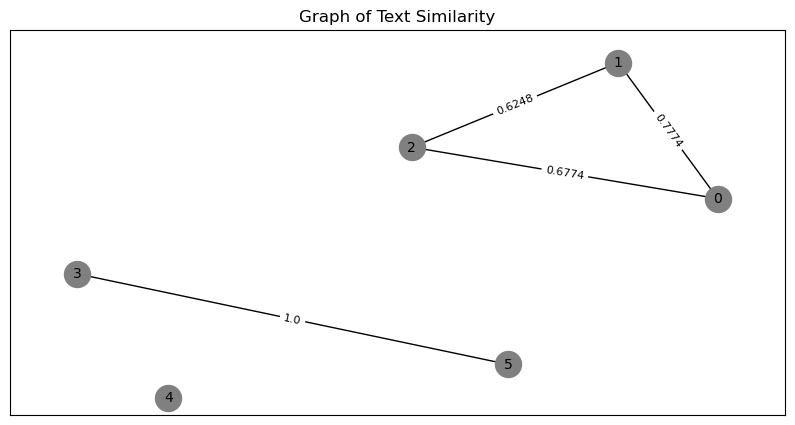

In [4]:
threshold = float(input('Enter threshold: '))
text = "This is a sentence. This is another sentence. These are two sentences.this is the last. Here are the fourth one. this is the last"
sentences = text.split(".")
graph = create_text_similarity_graph(sentences,threshold)
print_graph(graph)
